# EE559 Project Assignment 
## Student Perfromance Dataset / Classification

###   Reference Systems
###   Imports

In [66]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


#### Functions

In [67]:
#Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

def trivial_classifier(data):
    train_df = pd.read_csv('data/student_performance_test.csv')
    y_train = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_train
    Y_train = y_train['G1'].to_numpy()
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/len(Y_train)*100, np.count_nonzero(y_grades_train == 1)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 2)/len(Y_train)*100, np.count_nonzero(y_grades_train == 3)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 4)/len(Y_train)*100]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

### Read in the data

In [68]:
train_df = pd.read_csv('data/student_performance_test.csv')
#dataset_train = train_df.to_numpy()

In [69]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Trivial System

#### Removing categorical non-binary features and grades. 

In [70]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [71]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_train
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [72]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [73]:
y_test = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

In [74]:
Y_test_grades_pred = trivial_classifier(X_test)

In [75]:
trivial_cf_matrix = confusion_matrix(Y_test_grades_actual, Y_test_grades_pred)
print(trivial_cf_matrix)

[[ 0 15 22  0  0]
 [ 0 21 27  0  0]
 [ 0 15 24  0  0]
 [ 0 11 15  1  0]
 [ 0  4  8  0  0]]


[Text(0, 0.5, 'F'),
 Text(0, 1.5, 'D'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'B'),
 Text(0, 4.5, 'A')]

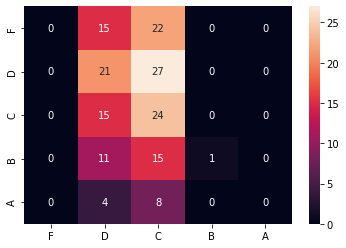

In [76]:
import seaborn as sns
labels = ['F', 'D', 'C', 'B', 'A']
ax = sns.heatmap(trivial_cf_matrix, annot=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)